In [11]:
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
warnings.filterwarnings("ignore")

In [13]:
# Generating synthetic data
np.random.seed(0)
data_size = 200
features = np.random.rand(data_size, 2)  # Two features: visit duration and pages visited
labels = (features[:, 0] + features[:, 1] > 1).astype(int)  # Purchase (1) or not (0)

In [14]:
# Convert to DataFrame for easier manipulation
df = pd.DataFrame(features, columns=['VisitDuration', 'PagesVisited'])
df['Purchase'] = labels

In [15]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[['VisitDuration', 'PagesVisited']], df['Purchase'], test_size=0.2, random_state=42)

In [16]:
# Define the model
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),  # Input layer with 2 features
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

In [17]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
# Train the model and save the history
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

Epoch 1/10
13/13 [==============================] - 0s 10ms/step - loss: 0.4933 - accuracy: 0.9531 - val_loss: 0.4625 - val_accuracy: 0.9375
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 0.4879 - accuracy: 0.9609 - val_loss: 0.4567 - val_accuracy: 0.9375
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.4825 - accuracy: 0.9609 - val_loss: 0.4513 - val_accuracy: 0.9375
Epoch 4/10
13/13 [==============================] - 0s 9ms/step - loss: 0.4768 - accuracy: 0.9609 - val_loss: 0.4456 - val_accuracy: 0.9688
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 0.4715 - accuracy: 0.9688 - val_loss: 0.4392 - val_accuracy: 0.9688
Epoch 6/10
13/13 [==============================] - 0s 6ms/step - loss: 0.4661 - accuracy: 0.9688 - val_loss: 0.4332 - val_accuracy: 0.9688
Epoch 7/10
13/13 [==============================] - 0s 6ms/step - loss: 0.4616 - accuracy: 0.9688 - val_loss: 0.4275 - val_accuracy: 0.9688
Epoch 8/10
13/13 [=

In [30]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

2/2 [==============================] - 0s 9ms/step - loss: 0.4491 - accuracy: 0.9250
Test Accuracy: 0.925000011920929


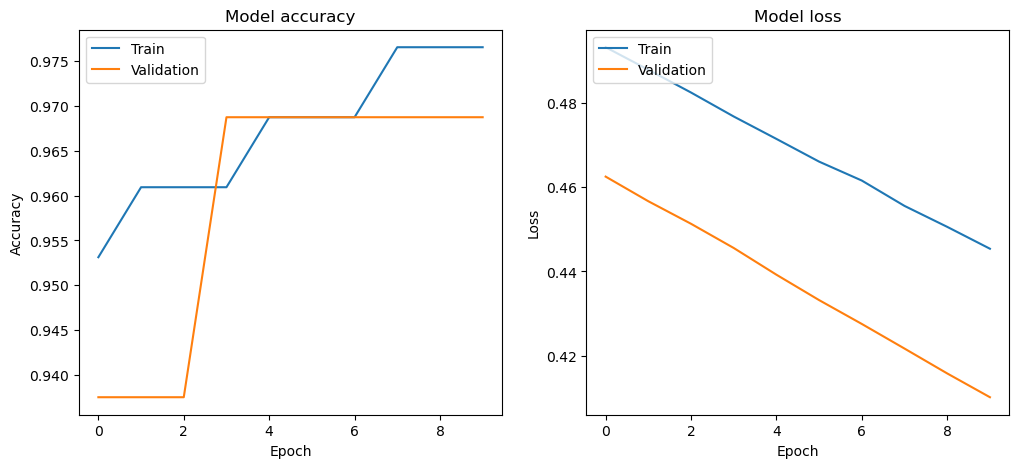

In [31]:
# Visualize the training process
# Plotting training and validation loss and accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

313/313 [==============================] - 1s 1ms/step


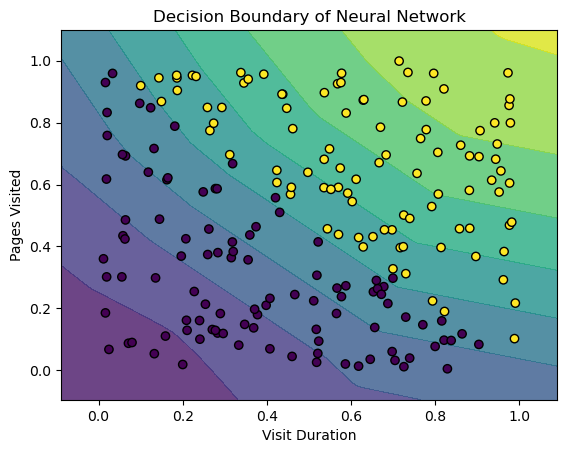

In [32]:
# Generate a grid over the feature space
x_min, x_max = df['VisitDuration'].min() - 0.1, df['VisitDuration'].max() + 0.1
y_min, y_max = df['PagesVisited'].min() - 0.1, df['PagesVisited'].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict over the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(df['VisitDuration'], df['PagesVisited'], c=df['Purchase'], edgecolor='k')
plt.xlabel('Visit Duration')
plt.ylabel('Pages Visited')
plt.title('Decision Boundary of Neural Network')
plt.show()